# Indexing and Retrieving with FAISS

In [1]:
!pip install -q langchain openai langchain-openai pypdf chromadb langchain-community faiss-cpu tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.7/806.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

In [3]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

1. Load PDF

In [4]:
loader = PyPDFLoader("/content/book.pdf")
pages = loader.load()

In [5]:
# pages

In [6]:
# pages[0].page_content

2. Break the character to chunk.

In [7]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=1000,
    chunk_overlap=800,
    length_function=len,
    is_separator_regex=False,
)

In [8]:
texts = text_splitter.split_documents(pages)

In [9]:
# texts

In [10]:
texts[0]

Document(page_content='The Machine \nLearning Solutions \nArchitect Handbook\nCreate machine learning platforms to run solutions \nin an enterprise setting\nDavid Ping\nBIRMINGHAM—MUMBAI', metadata={'source': '/content/book.pdf', 'page': 1})

3. Create Embeddings

In [11]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-large",
                              openai_api_key = OPENAI_API_KEY,
                              show_progress_bar=True)

In [12]:
# embeddings.__dict__ # this will expose the api key

check how embeddings look

In [13]:
query_result = embeddings.embed_query('Hello')

  0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
len(query_result)

3072

In [15]:
query_result

[-0.0381072267306828,
 -0.02189138671798178,
 -0.0016550293309017003,
 -0.005578249575316746,
 -0.003964773295681291,
 0.008059273304013608,
 0.0028519611204429695,
 0.036453212774196664,
 0.010775427106844076,
 0.04582596846172533,
 0.0016489483766942686,
 -0.024388625703683425,
 -0.03791263619604498,
 0.016734748725950238,
 -0.026626411264083015,
 0.022994063309854238,
 0.02108059406542094,
 0.0033891109500846952,
 0.005525547894575457,
 -0.008610611599949837,
 0.01566450264808734,
 0.0035918088803942663,
 -0.007657931024815023,
 0.04115580680628834,
 0.008537640615121933,
 0.020886003530783123,
 -0.045015177671809604,
 -0.008724123055596084,
 -0.02831285945986893,
 -0.012340255752820077,
 -0.002118194198283785,
 0.02065898248213574,
 0.009316000891028098,
 0.014213185457757588,
 0.039955834947096966,
 0.009948419197278456,
 0.01856713889139196,
 0.0026452091430515644,
 -0.018129311119779425,
 0.022783256586889084,
 0.01775634623883112,
 0.01563207213407778,
 -0.01472398421419803,
 0

In [16]:
query_result = embeddings.embed_query('Hello there')

  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
query_result

[-0.04579612775876936,
 -0.0016247270974802243,
 -8.55682477338611e-05,
 0.012706884635683258,
 0.006717107498039801,
 -0.018465627642688488,
 -0.01649755857054206,
 0.05305231551584676,
 0.01244162346788597,
 0.026115429586724217,
 -0.00780382454257411,
 -0.023274564082102173,
 -0.02229908560682677,
 0.034877618154671594,
 -0.039943260632407364,
 0.030034455609421452,
 -0.03017136562070291,
 -0.006216533237882777,
 -0.025875839395288182,
 -0.03939562058728152,
 0.028100612643111478,
 0.0051982711989891975,
 0.0025071497968453295,
 0.020399470608998462,
 -0.006058232143284186,
 0.028340204697192728,
 -0.029640841422463125,
 0.005262447242908415,
 -0.0481578091552289,
 -0.03136932216581873,
 0.02445540664297716,
 0.022418881633867394,
 0.005780135487306274,
 0.016583126629101014,
 0.03665743898810449,
 0.0025948571034343903,
 0.021066902955874496,
 0.008278727826369882,
 0.00041072758912253325,
 0.025858725411047345,
 0.022590017750985306,
 0.022418881633867394,
 -0.023154768055061548,


## **Calculating the cosine similarity**

In [18]:
import numpy as np
from numpy.linalg import norm #linearalgebra import normalizer

def get_cosine_similarity(embd_1, embd_2):
  return np.dot(embd_1, embd_2) / (norm(embd_1) * norm(embd_2))

In [19]:
embd_1 = embeddings.embed_query("Machine Learning")
embd_2 = embeddings.embed_query("Generative AI")

cosine_similarity_score = get_cosine_similarity(embd_1, embd_2)
cosine_similarity_score

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0.4210752736786197

In [20]:
embd_1 = embeddings.embed_query("Artificial Intelligence")
embd_2 = embeddings.embed_query("Generative AI")

cosine_similarity_score = get_cosine_similarity(embd_1, embd_2)
cosine_similarity_score

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0.5465069789115228

In [21]:
embd_1 = embeddings.embed_query("Pizza")
embd_2 = embeddings.embed_query("Noodles")

cosine_similarity_score = get_cosine_similarity(embd_1, embd_2)
cosine_similarity_score

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0.41229884432617403

In [22]:
embd_1 = embeddings.embed_query("Pizza")
embd_2 = embeddings.embed_query("Machine Learning")

cosine_similarity_score = get_cosine_similarity(embd_1, embd_2)
cosine_similarity_score

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0.13894146153709538

4. Create Index - Vector DB

In [23]:
db = FAISS.from_documents(texts, embeddings) # Index

  0%|          | 0/3 [00:00<?, ?it/s]

Querying

In [24]:
query = "What is Machine Learning"
docs = db.similarity_search(query)

  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
docs[0].page_content

"a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail."

In [26]:
docs = db.similarity_search_with_relevance_scores(query)

  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
docs[0]

(Document(page_content="a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail.", metadata={'so

Save and Load db

In [28]:
db.save_local("faiss_index")

new_db = FAISS.load_local("faiss_index", embeddings)

docs = new_db.similarity_search(query)

  0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
docs[0].page_content

"a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail."

Create Retriever

In [30]:
retriever = new_db.as_retriever()

# FAISS vectorstore can also support filtering. This is done by first fetching more results than k and then filtering them.
retriever.search_kwargs['fetch_k'] = 20 # filtering
retriever.search_kwargs['maximal_marginal_relevance'] = True
retriever.search_kwargs['k'] = 10

In [31]:
docs = retriever.invoke(query)

  0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
import pprint
pprint.pprint(docs)

[Document(page_content="a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail.", metadata={'so

5. Use along with LLM

In [33]:
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler

In [34]:
llm = ChatOpenAI(openai_api_key = OPENAI_API_KEY,
                 temperature = 0.1,
                 )

In [35]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    verbose = True
)

In [36]:
handler = StdOutCallbackHandler()

In [37]:
response = chain.run(query,
                     callbacks = [handler])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new RetrievalQA chain...


  0%|          | 0/1 [00:00<?, ?it/s]



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
a system has to be powered only by ML. An AI system can also be powered by other 
techniques, such as rule-based engines. ML is a form of AI that learns how to perform a 
task using different learning techniques, such as learning from examples using historical 
data or learning by trial and error. An example of ML would be making credit decisions 
using an ML algorithm with access to historical credit decision data.
Deep learning  (DL) is a  subset of ML that uses a large number of artificial neurons 
(known as an artificial neural network ) to learn, which is similar to how a human 
brain learns. An example of a deep learning-based solution  is the Amazon  Echo  
virtual assistant . To better unders

In [38]:
response

'Machine Learning (ML) is a subset of Artificial Intelligence (AI) that focuses on the development of algorithms and models that enable computers to learn and make predictions or decisions without being explicitly programmed. ML algorithms learn from data, identify patterns, and make predictions or take actions based on that learning. ML involves training a model on a dataset, which consists of input data and corresponding output labels or target values. The model then uses this training to make predictions or decisions on new, unseen data. ML techniques include supervised learning, unsupervised learning, and reinforcement learning.'

# Using Chroma DB

In [39]:
from langchain_community.vectorstores import Chroma

In [40]:
# db = Chroma.from_documents(texts, embeddings)

# Save to disk
db = Chroma.from_documents(texts, embeddings, persist_directory='chroma')

docs = db.similarity_search(query)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
docs[0].page_content

"a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail."

In [42]:
docs = db.similarity_search_with_score(query)

  0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
docs[0]

(Document(page_content="a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail.", metadata={'pa

In [44]:
# Load from the disk
db = Chroma(persist_directory='chroma', embedding_function=embeddings)
docs = db.similarity_search_with_score(query)

  0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
docs

[(Document(page_content="a system has to be powered only by ML. An AI system can also be powered by other \ntechniques, such as rule-based engines. ML is a form of AI that learns how to perform a \ntask using different learning techniques, such as learning from examples using historical \ndata or learning by trial and error. An example of ML would be making credit decisions \nusing an ML algorithm with access to historical credit decision data.\nDeep learning  (DL) is a  subset of ML that uses a large number of artificial neurons \n(known as an artificial neural network ) to learn, which is similar to how a human \nbrain learns. An example of a deep learning-based solution  is the Amazon  Echo  \nvirtual assistant . To better understand how ML works, let's first talk about the different \napproaches taken by machines to learn. They are as follows:\n• Supervised ML\n• Unsupervised machine learning\n• Reinforcement learning\nLet's have a look at each one of them in detail.", metadata={'p

5. Using LLM

In [47]:
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler

In [48]:
llm = ChatOpenAI(openai_api_key = OPENAI_API_KEY,
                 temperature = 0.1,
                 )

In [56]:
retriever = db.as_retriever(search_type="mmr")

In [57]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    verbose = True
)

In [58]:
chain.run(query,
          callbacks=[handler])



> Entering new RetrievalQA chain...


  0%|          | 0/1 [00:00<?, ?it/s]



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
a system has to be powered only by ML. An AI system can also be powered by other 
techniques, such as rule-based engines. ML is a form of AI that learns how to perform a 
task using different learning techniques, such as learning from examples using historical 
data or learning by trial and error. An example of ML would be making credit decisions 
using an ML algorithm with access to historical credit decision data.
Deep learning  (DL) is a  subset of ML that uses a large number of artificial neurons 
(known as an artificial neural network ) to learn, which is similar to how a human 
brain learns. An example of a deep learning-based solution  is the Amazon  Echo  
virtual assistant . To better unders

'Machine Learning (ML) is a subset of Artificial Intelligence (AI) that focuses on the development of algorithms and models that enable computers to learn and make predictions or decisions without being explicitly programmed. ML algorithms learn from data and improve their performance over time through experience. They analyze and interpret patterns, relationships, and trends in data to make predictions or take actions. ML can be supervised, unsupervised, or reinforcement-based, depending on the learning approach used. It has various applications, such as image recognition, natural language processing, recommendation systems, and predictive analytics.'

# Stuff Strategy.

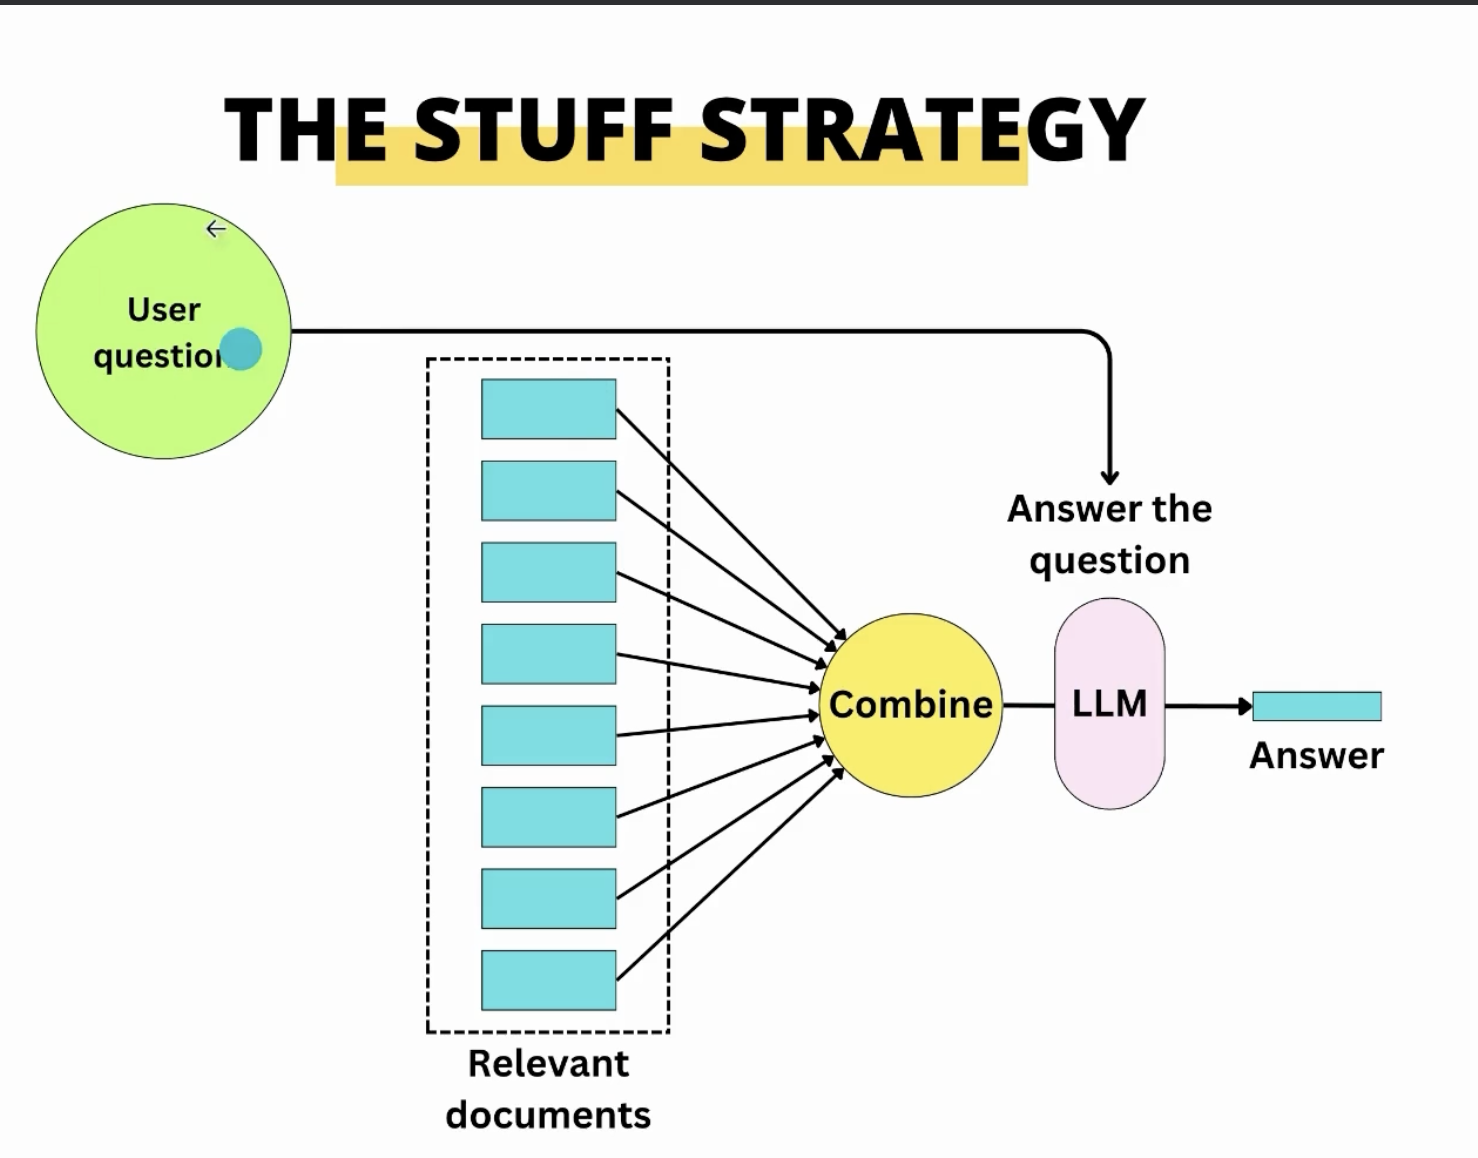

In [59]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    chain_type='stuff',
    verbose = True
)

In [61]:
chain.run(query,
          callbacks=[StdOutCallbackHandler()])



> Entering new RetrievalQA chain...


  0%|          | 0/1 [00:00<?, ?it/s]



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
a system has to be powered only by ML. An AI system can also be powered by other 
techniques, such as rule-based engines. ML is a form of AI that learns how to perform a 
task using different learning techniques, such as learning from examples using historical 
data or learning by trial and error. An example of ML would be making credit decisions 
using an ML algorithm with access to historical credit decision data.
Deep learning  (DL) is a  subset of ML that uses a large number of artificial neurons 
(known as an artificial neural network ) to learn, which is similar to how a human 
brain learns. An example of a deep learning-based solution  is the Amazon  Echo  
virtual assistant . To better unders

'Machine Learning (ML) is a subset of Artificial Intelligence (AI) that focuses on the development of algorithms and models that enable computers to learn and make predictions or decisions without being explicitly programmed. ML algorithms learn from data, identify patterns, and make predictions or take actions based on those patterns. ML algorithms can improve their performance over time by continuously learning from new data. There are different types of ML approaches, such as supervised learning, unsupervised learning, and reinforcement learning, each with its own techniques and applications. ML is used in various fields, including finance, healthcare, marketing, and more, to solve complex problems and make data-driven decisions.'

# Map-Reduce

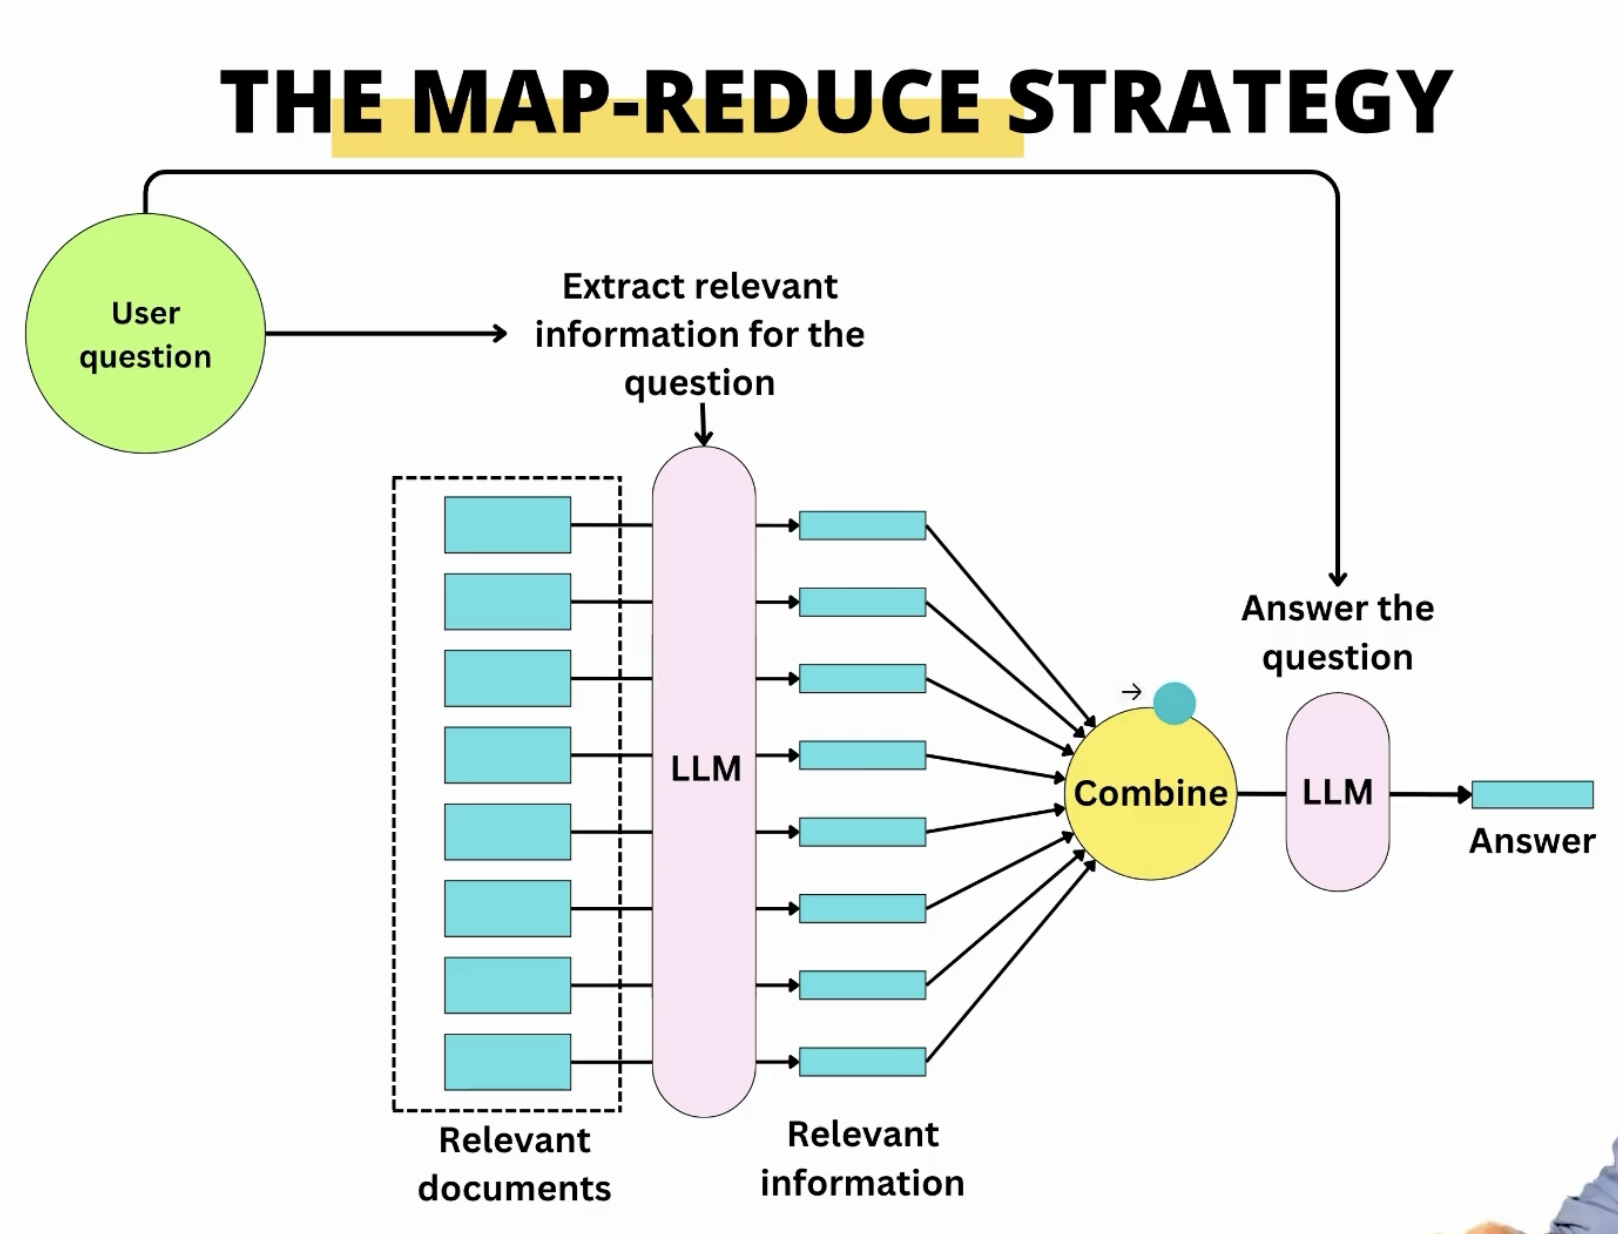

In [65]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    chain_type='map_reduce', #['stuff', 'map_reduce', 'refine', 'map_rerank']
    verbose = True
)

In [67]:
chain.run(query,
          callbacks=[StdOutCallbackHandler()])



> Entering new RetrievalQA chain...


  0%|          | 0/1 [00:00<?, ?it/s]



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following portion of a long document to see if any of the text is relevant to answer the question. 
Return any relevant text verbatim.
______________________
a system has to be powered only by ML. An AI system can also be powered by other 
techniques, such as rule-based engines. ML is a form of AI that learns how to perform a 
task using different learning techniques, such as learning from examples using historical 
data or learning by trial and error. An example of ML would be making credit decisions 
using an ML algorithm with access to historical credit decision data.
Deep learning  (DL) is a  subset of ML that uses a large number of artificial neurons 
(known as an artificial neural network ) to learn, which is similar to how a human 
brain learns. An example of a deep learning-based solution  is the Amazon  Echo  
virtual assistant . To better understand ho

'Machine Learning is a form of Artificial Intelligence that involves the use of algorithms and statistical models to enable computers to learn and make predictions or decisions without being explicitly programmed. It involves the development of algorithms and models that can analyze and interpret data, identify patterns, and make informed decisions or predictions. Machine Learning algorithms learn from data and improve their performance over time through experience.'

# Refine

In [68]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    chain_type='refine', #['stuff', 'map_reduce', 'refine', 'map_rerank']
    verbose = True
)

In [69]:
chain.run(query,
          callbacks=[StdOutCallbackHandler()])



> Entering new RetrievalQA chain...


  0%|          | 0/1 [00:00<?, ?it/s]



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Context information is below.
------------
a system has to be powered only by ML. An AI system can also be powered by other 
techniques, such as rule-based engines. ML is a form of AI that learns how to perform a 
task using different learning techniques, such as learning from examples using historical 
data or learning by trial and error. An example of ML would be making credit decisions 
using an ML algorithm with access to historical credit decision data.
Deep learning  (DL) is a  subset of ML that uses a large number of artificial neurons 
(known as an artificial neural network ) to learn, which is similar to how a human 
brain learns. An example of a deep learning-based solution  is the Amazon  Echo  
virtual assistant . To better understand how ML works, let's first talk about the different 
approaches taken by machines to learn. They are as follows:
• Supervised ML


'Machine Learning is a field of study that focuses on developing algorithms and models that enable computers to learn and make predictions or decisions without being explicitly programmed. It involves the use of statistical techniques and computational algorithms to analyze and interpret large amounts of data.\n\nDuring model training, every neuron in every layer of a neural network, such as a Multi-Layer Perceptron (MLP), has some influence on the final output. The weights of these neurons are adjusted using a gradient descent algorithm to optimize the training objective. This process, called backpropagation, propagates the total error back into every neuron in every layer, and the weights for each neuron are adjusted accordingly.\n\nMLP is a general-purpose neural network that can be used for classification and regression tasks. It can solve similar problems as random forest and XGBoost algorithms. MLP is commonly used for tabular datasets but can also work with other data formats li

# Map Rerank

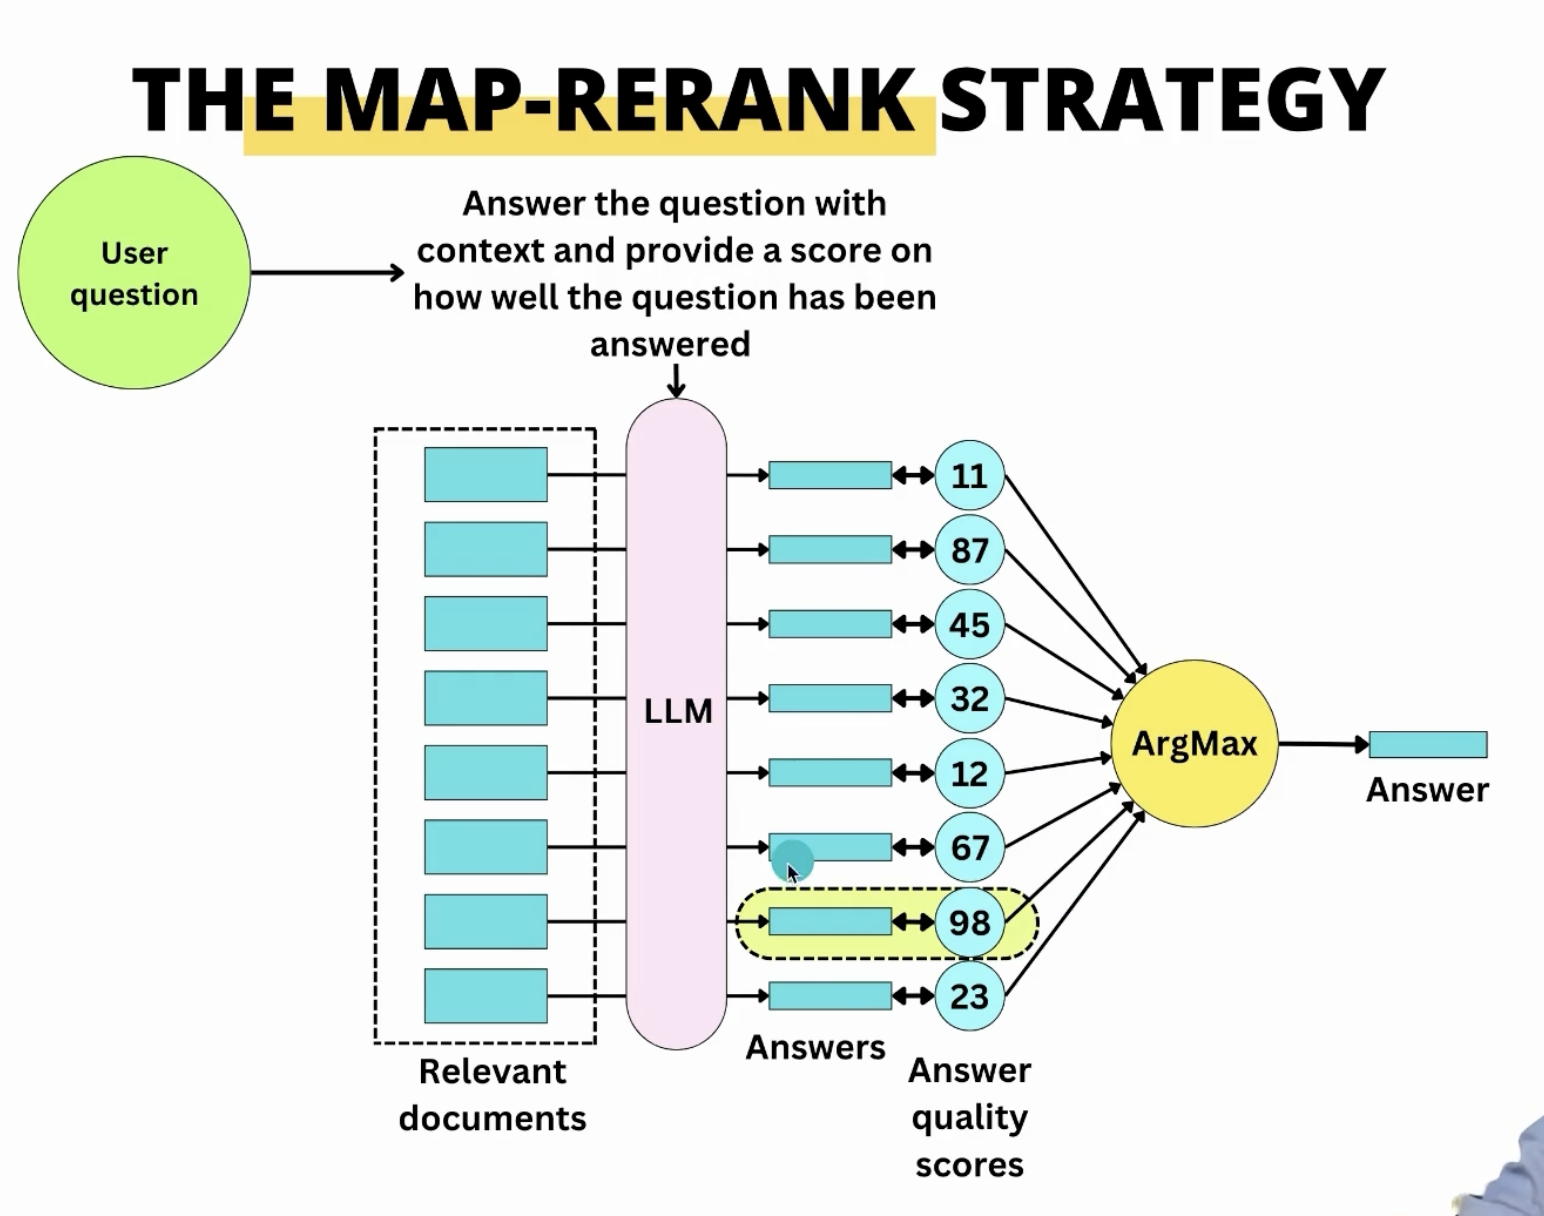

In [70]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    chain_type='map_rerank', #['stuff', 'map_reduce', 'refine', 'map_rerank']
    verbose = True
)

In [72]:
chain.run(query,
          callbacks=[StdOutCallbackHandler()])



> Entering new RetrievalQA chain...


  0%|          | 0/1 [00:00<?, ?it/s]



> Entering new MapRerankDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

In addition to giving an answer, also return a score of how fully it answered the user's question. This should be in the following format:

Question: [question here]
Helpful Answer: [answer here]
Score: [score between 0 and 100]

How to determine the score:
- Higher is a better answer
- Better responds fully to the asked question, with sufficient level of detail
- If you do not know the answer based on the context, that should be a score of 0
- Don't be overconfident!

Example #1

Context:
---------
Apples are red
---------
Question: what color are apples?
Helpful Answer: red
Score: 100

Example #2

Context:
---------
it was night and the witness forgot his glasses. he was not sure if it was a sports car or an suv
--

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:344: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(



> Finished chain.


ValueError: Could not parse output: Machine Learning is a type of learning where an ML model learns by trying out different actions and adjusts its future behaviors based on the received response from the action. It involves the model making predictions or taking actions based on patterns or examples in the data it has been trained on. In the case of reinforcement learning, the model learns by trial and error, trying out different actions and learning from the responses it receives.